## CS342 Machine Learning

### Department of Computer Science, University of Warwick

## Lab 5

In this lab, you will design and train a Multi-layer Perceptron (MLP) network, or neural network (NN), for classification tasks. This lab uses the _Labeled Faces in the Wild_ (LFW) dataset and relies on the code used in Lab 4 for PCA. To design the NN architecture, you will use the Keras Library.

## 1. Use the code below to upload and split the LFW dataset used in Lab 4:

a. Recall that when working with images, they should be converted from a matrix representation to feature vectors.

b. Make sure the file _cm.png_ , which is available on the module website, is stored in the same directory as this Jupyter file.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL 
import pandas as pd
from sklearn.model_selection import train_test_split


# Load all the images
X = np.load("./data/X.npy")
y = np.load("./data/Y.npy")

# Display the number of samples
print ("Total number of images: ",X.shape[0])

#Reshape the first image
first_image = X[0].reshape(62,47)
h , w = first_image.shape

# Display the width and height of each image
print ("Image HEIGHT: ",h)
print ("Image WIDTH: ",w)

target_names = ['Colin Powell','Donald Rumsfeld','George W Bush','Gerhard Schroeder','Tony Blair']

# Display the classes available in the dataset
print ("Classes : %d" % len(target_names),target_names)

# Split all data (X) into a training and testing datasets. The test dataset contains 30% of all data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n, d = X_train.shape
print ("Number of images in the training dataset: ",n)
print ("Dimensions of feature vectors in the training dataset: ",d)
n, d = X_test.shape
print ("Number of images in the test dataset: ",n)
print ("Dimensions of feature vectors in the test dataset: ",d)

plt.imshow(first_image, cmap='bone')
plt.title("First image in dataset X")
plt.show()


Total number of images:  1140
Image HEIGHT:  62
Image WIDTH:  47
Classes : 5 ['Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Tony Blair']
Number of images in the training dataset:  798
Dimensions of feature vectors in the training dataset:  2914
Number of images in the test dataset:  342
Dimensions of feature vectors in the test dataset:  2914


<Figure size 640x480 with 1 Axes>

## 2. Building an NN architecture for classification using Keras.

Keras is a high-level neural networks API written in Python. It allows for easy and fast prototyping of NN architectures (see https://keras.io/ for more information). In this lab, the following implementations and commands available through Keras will help you build NN architectures using fully-connected layers:

1. _keras.utils.to_categorical_ converts categorical labels to one-hot encoded vectors. For example, if there are a total of three classes in a dataset and example **x**$_i$ has a label=2, the one-hot encoded vector of this label is [0,0,1]. Recall that the LFW dataset has 5 classes: {'Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Tony Blair'}.


2. There are two ways to build NN architectures using Keras: sequential or functional. The sequential API allows creating models layer-by-layer for most problems. It is easy to work with, but it does not allow creating models that share layers or have multiple inputs. The functional API allows creating more complex models with shared layers and multiple inputs or outputs. In this lab, the NN architectures should be defined as sequential models. For example, the following line defines a model as sequential:

        model = Sequential( )


3. Fully-connected layers with a specific number of neurons may be added to a model as follows:

        model.add(Dense(128, activation='sigmoid', use_bias='true', input_dim=20))
    
      The previous line creates a first hidden layer with 128 neurons, the Sigmoid function as the non-linear activation function, and a bias. This layer expects input feature vectors of 20 dimensions.
      
      
4. To train an NN architecture, we will use stochastic gradient descent (SGD) with a specific learning rate. This optimizer is available through the _SGD_ implementation. See https://keras.io/optimizers/#sgd for more details. For example:
   
       sgd = SGD(lr=0.01)
       
      where the learning rate is set to 0.01.

5. To define the loss function and metric to measure accuracy, the _complile_ command can be used as follows:

       model.compile(loss='categorical_crossentropy', optimizer=sgd , metrics=['accuracy'])
       
   Recall that the categorical cross entropy loss function is the Softmax loss function commonly used in multi-class classification.
   
       
6. To train an NN architecture, the _fit_ command can be used as follows:
        
        model.fit(X_train, y_train, epochs=50, batch_size=128)
        
      where X_train and y_train are the training examples and corresponding labels, respectively, 'epochs' refers to the training steps used by SGD, and 'batch_size' indicates how many training samples to use in each feedforward pass.


7. To evaluate a trained model, the command _evaluate_ can be used to compute the loss and the accuracy on the test dataset. 

        score = model.evaluate(X_test, y_test, batch_size=128)
        print (score)
        
        
8. Another useful command is _summary_ , which prints a summary of an NN architecture. For example:

        print (model.summary()) 
        
9. The following commands are useful to display the labels predicted for specific examples:
        
        print ("The prediction for test example number 10 is:", model.predict(X_test[10:11])) 
        
      The previous line displays a vector of predictions (or activations) for test example 10 if there are several classes in the dataset. For example, if there are three classes in the dataset, a possible output would be: [0.2819989  0.3408617  0.37713936]
     
        print ("The predicted class for test example number 10 is:" , model.predict_classes(X_test[10:11])) 

      The previous line displays the specific class predicted for test example number 10 by choosing the output with the highest activation. For example, for the vector [0.2819989    0.3408617     0.37713936], the predicted class is class 2 with an activation  = 0.37713936.

        print ("The ground truth class for test example number 10 is:" ,y_test[10:11]) 
        
      The previous line displays the ground truth for test example number 10. If one-hot encoded vectors are used, the ground truth may look like this: [1. 0. 0.]


10. To be able to use the commands listed before, we must import the following libraries:

        import keras
        from keras.models import Sequential
        from keras.layers import Dense, Activation
        from keras.optimizers import SGD

**Note:** Keras allows saving the weights of a trained model for future use. To save the weights of a trained model, you may use the *save_weights* command. To load a set of saved weights, you may use the command *load_weights*.



## 3. The Confusion Matrix.

A confusion matrix is a graphical representation of the performance of a classifier. As the name suggests, it is a matrix with columns as the predictions and rows as the ground truth labels. The number of rows and columns is equal to the number of classes. The confusion matrix has then $k \times k$ cells for a classification task with $k$ classes. All cells have initially a value of 0. If a prediction matches the ground truth label for feature vector **x**$_{i}$, the value of the cell where the ground truth equals the prediction is increased by 1. On the contrary, if the prediction is not equal to the ground truth label, the value of the cell at the row associated with the ground truth label and the column associated with the incorrect prediction is increased by 1. The next figure shows a sample non-normalized confusion matrix for the classes in the LFW dataset (if the figure is not displayed, make sure the file _cm.png_ , which is available on the module website, is stored in the same directory as this Jupyter file, and re-run the next cell).

<img src="./cm.png"> 

## 4. Design an NN architecture using Keras with two fully-connected hidden layers to classify the test images of the LFW dataset after PCA transformation (50 marks: 25 marks for each NN architecture):

a. Train your NN with the transformed training dataset using {100,50} PCs.

b. The first hidden layer should have 40 neurons, while the second should have 20 neurons. Use bias and a Sigmoid function as the non-linear activation function for these hidden layers. 

c. Make sure to select the correct number of inputs and outputs. Remember to convert the labels of the dataset to one-hot encoded vectors. Use the appropriate activation function for the outputs so that they are expressed in terms of probabilities ranging from 0 to 1.

d. Use the _categorical_crossentropy_ as the loss function, SGD as the optimizer and _accuracy_ as the metric.

e. Set the learning rate to 0.05 for SGD and the batch size to 64 for 500 epochs. 

f. After training your architecture for each case, calculate and display the accuracy of the model on the transformed test dataset.

g. Plot the training accuracy with respect to (w.r.t) the epochs used for training.

h. Plot the training loss w.r.t the epochs used for training.

i. Import *confusion_matrix* from _sklearn.metrics_ to create and display the **normalized** confusion matrix of your NN on the test dataset.

798/798 [==============================] - 0s 33us/step
[0.6774775436647554, 0.7644110321998596]
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 40)                4040      
_________________________________________________________________
dense_14 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 105       
Total params: 4,965
Trainable params: 4,965
Non-trainable params: 0
_________________________________________________________________
None
798/798 [==============================] - 0s 35us/step
[0.6500023713984286, 0.7593985199928284]
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             

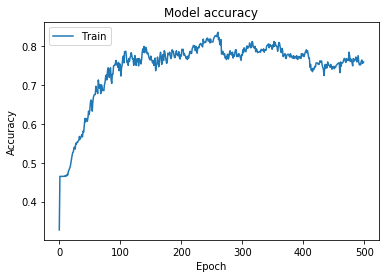

PCs = 100 Training Loss Plot


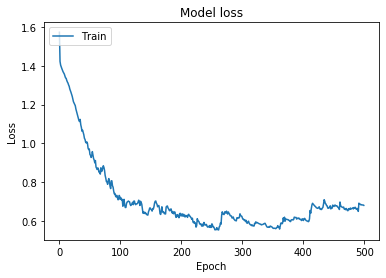

PCs = 50


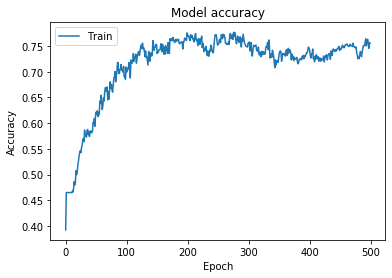

PCs = 50 Training Loss Plot


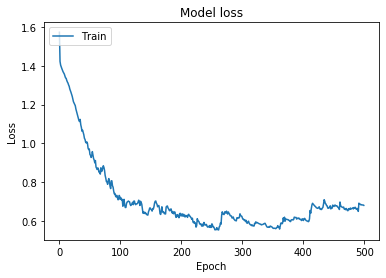

Normalized Confusion Matrix for 100 PCs
Normalized Confusion Matrix for 50 PCs


<function matplotlib.pyplot.show(*args, **kw)>

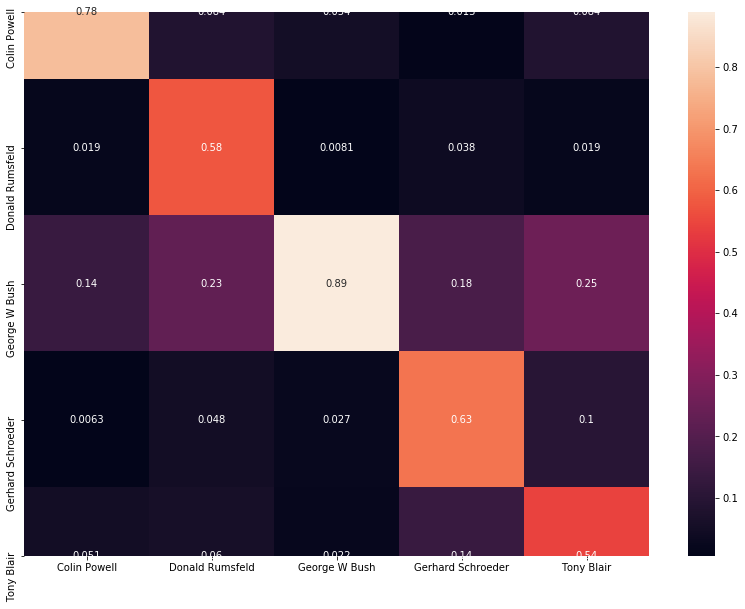

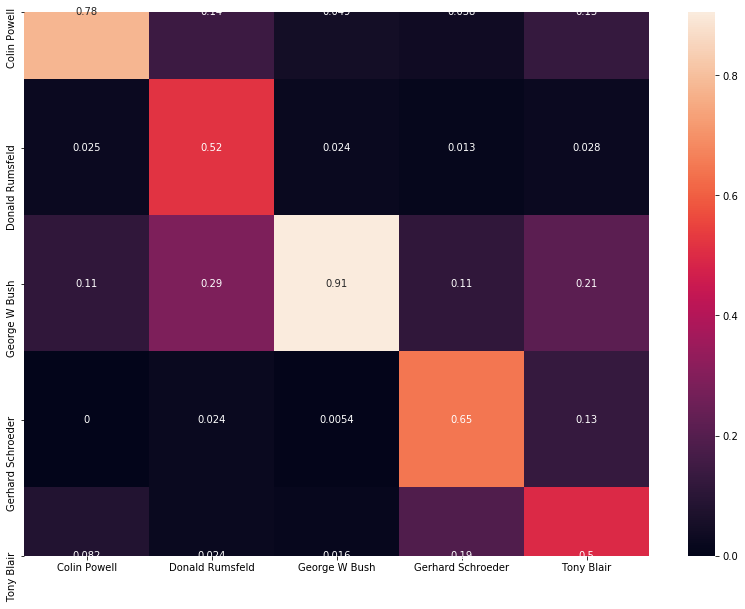

In [5]:
import seaborn as sn
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix as c_matrix


def comp_PCA (d_set, nb_PC):
    
    
    dt_mean = np.mean(d_set)
    means = np.array([])
    X_cnt = d_set.copy()
    T_PC = []
    num_col = len(d_set[0])
    
    
    for i in range(num_col):
        
        mean = np.mean(d_set[:,i])
        means = np.append(means , mean)
        
        for j in range(len(d_set)):
            X_cnt[j][i] = d_set[j][i] - mean
    
    u, s, v = np.linalg.svd(X_cnt, full_matrices=True)
    
    
    
    if nb_PC < len(v):
        
        for i in range(nb_PC):
            
            T_PC.append(v[i])
    else:
        
        print('There are not enough PCs for the number of top PCs asked for.')
    
  
    return dt_mean, T_PC



def Transform (Train_set, Test_set):
    
    dt_mean, T_PC = comp_PCA(Test_set, 2)
    dt_mean_train, T_PC100 = comp_PCA(Train_set, 100)
    dt_mean_train, T_PC50 = comp_PCA(Train_set, 50)
    
    X = Train_set - dt_mean_train
    
    PC100 = np.array(T_PC100)
    PC50 = np.array(T_PC50)
    
    W100 = PC100.transpose()
    W50 = PC50.transpose()
    
    z100 = np.matmul(X, W100)
    z50 = np.matmul(X, W50)
    
    return z100, z50


z100, z50 = Transform(X_train, X_test)

y_hot = keras.utils.to_categorical(y_train)

sgd = SGD(learning_rate=0.05)

model100 = Sequential()

model100.add(Dense(40, activation='sigmoid', use_bias='true', input_dim=100))

model100.add(Dense(20, activation='sigmoid', use_bias='true', input_dim=40))

model100.add(Dense(5, activation='softmax', use_bias='true'))


model100.compile(loss='categorical_crossentropy', optimizer=sgd , metrics=['accuracy'])

history100 = model100.fit(z100, y_hot, epochs=500, batch_size=64, verbose=0 )

score100 = model100.evaluate(z100, y_hot, batch_size=64)
print (score100)

print (model100.summary())


model50 = Sequential()

model50.add(Dense(40, activation='sigmoid', use_bias='true', input_dim=50))

model50.add(Dense(20, activation='sigmoid', use_bias='true', input_dim=40))

model50.add(Dense(5, activation='softmax', use_bias='true'))


model50.compile(loss='categorical_crossentropy', optimizer=sgd , metrics=['accuracy'])

history50 = model50.fit(z50, y_hot, epochs=500, batch_size=64,verbose=0 )

score50 = model50.evaluate(z50, y_hot, batch_size=64)
print (score50)


print (model50.summary())
print()
print('PCs = 100 Accuracy Plot')
plt.plot(history100.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
print('PCs = 100 Training Loss Plot')
plt.plot(history100.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print('PCs = 50')
plt.plot(history50.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print('PCs = 50 Training Loss Plot')
plt.plot(history100.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


conf_matrix = c_matrix(np.argmax(model100.predict(z100), axis=1),y_train)
nconf_matrix = conf_matrix/(conf_matrix.astype(np.float).sum(axis=0))

df_cm = pd.DataFrame(nconf_matrix, index = [i for i in target_names],
                  columns = [i for i in target_names])
print('Normalized Confusion Matrix for 100 PCs')
plt.figure(figsize = (14,10))
sn.heatmap(df_cm, annot=True)
plt.show

conf_matrix2 = c_matrix(np.argmax(model50.predict(z50), axis=1),y_train)
nconf_matrix2 = conf_matrix2/(conf_matrix2.astype(np.float).sum(axis=0))

df_cm2 = pd.DataFrame(nconf_matrix2, index = [i for i in target_names],
                  columns = [i for i in target_names])
print('Normalized Confusion Matrix for 50 PCs')
plt.figure(figsize = (14,10))
sn.heatmap(df_cm2, annot=True)
plt.show

## 5. Design an NN architecture using Keras with two fully-connected hidden layers to classify the test images of the LFW dataset in the pixel domain (25 marks ):

a. The first hidden layer should have 1000 neurons, while the second should have 500 neurons. Use bias and a Sigmoid function as the non-linear activation function for these hidden layers. 

b. Make sure to select the correct number of inputs and outputs. Remember to convert the labels of the dataset to one-hot encoded vectors. Use the appropriate activation function for the outputs so that they are expressed in terms of probabilities ranging from 0 to 1.

c. Use the _categorical_crossentropy_ as the loss function, SGD as the optimizer and _accuracy_ as the metric.

d. Set the learning rate to 0.002 and the batch size to 128 for 500 epochs. Note that the training process may take longer than the previous cases due to the size of the feature vectors.

e. After training your architecture, calculate and display the accuracy of your model on the test dataset.

f. Plot the training accuracy w.r.t the epochs used for training.

g. Plot the training loss w.r.t the epochs used for training.

h. Create and display the **normalized** confusion matrix of your model.

798/798 [==============================] - 0s 95us/step
[0.6076186632452752, 0.8258145451545715]
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              2915000   
_________________________________________________________________
dense_8 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 2505      
Total params: 3,418,005
Trainable params: 3,418,005
Non-trainable params: 0
_________________________________________________________________
None
PCs = 100 Accuracy Plot


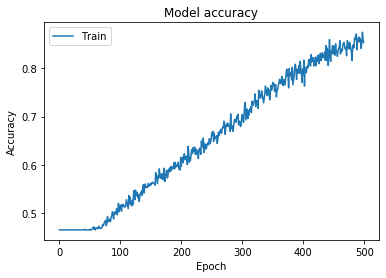

PCs = 100 Training Loss Plot


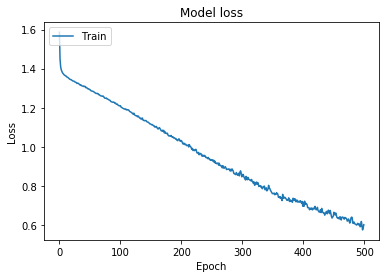

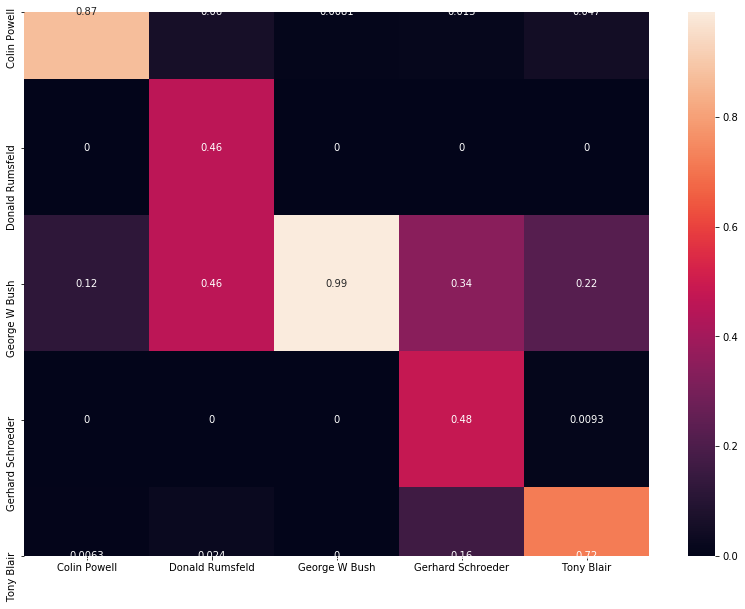

In [3]:

sgd = SGD(learning_rate=0.002)

modelpi= Sequential()

modelpi.add(Dense(1000, activation='sigmoid', use_bias='true', input_dim=2914))

modelpi.add(Dense(500, activation='sigmoid', use_bias='true', input_dim=1000))

modelpi.add(Dense(5, activation='softmax', use_bias='true'))

modelpi.compile(loss='categorical_crossentropy', optimizer=sgd , metrics=['accuracy'])

historypi = modelpi.fit(X_train, y_hot, epochs=500, batch_size=128, verbose=0 )

scorepi = modelpi.evaluate(X_train, y_hot, batch_size=64)

print (scorepi)

print (modelpi.summary())

print('PCs = 100 Accuracy Plot')
plt.plot(historypi.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print('PCs = 100 Training Loss Plot')
plt.plot(historypi.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


conf_matrix2 = c_matrix(np.argmax(modelpi.predict(X_train), axis=1),y_train)
nconf_matrix2 = conf_matrix2/(conf_matrix2.astype(np.float).sum(axis=0))

df_cm2 = pd.DataFrame(nconf_matrix2, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (14,10))
sn.heatmap(df_cm2, annot=True)

## 6. Design an NN architecture using Keras with two fully-connected hidden layers to classify the test images of the LFW dataset in the pixel domain and plot the output of the last hidden layer (25 marks):

a. The first hidden layer should have 1000 neurons and the second hidden layer should have 2 neurons. Use bias and a Sigmoid function as the non-linear activation function for these hidden layers.

b. Make sure to select the correct number of inputs and outputs. Remember to convert the labels of the dataset to one-hot encoded vectors. Use the appropriate activation function for the outputs so that they are expressed in terms of probabilities ranging from 0 to 1.

c. Use the _categorical_crossentropy_ as the loss function, SGD as the optimizer and _accuracy_ the metric.

d. Set the learning rate to 0.002 and the batch size to 128 for 1000 epochs. 

e. After training your NN, calculate and display the accuracy of your model on the test dataset. Note that this NN may achieve a low accuracy due to the number of neurons used in the last hidden layer. Also note that the training time is expected to be larger for this NN, as more epochs are used to achieve a high training accuracy given the number of neurons used in the last hidden layer. 

f. After training, create a plot similar to the one in Lab 4, point 5.c, to display the 2-dimensional (2d) hidden representation of all test examples as computed by the trained model. The _x_-axis should represent one dimension, while the _y_-axis should represent the other dimension. Label your axes appropriately. **Hint:** find which hidden layer computes a 2d hidden representation and get the output of that hidden layer for each test example. You may use the keras backend to get this output.


342/342 [==============================] - 0s 134us/step
[1.2488102250629, 0.4649122953414917]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1000)              2915000   
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 2002      
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 15        
Total params: 2,917,017
Trainable params: 2,917,017
Non-trainable params: 0
_________________________________________________________________
None


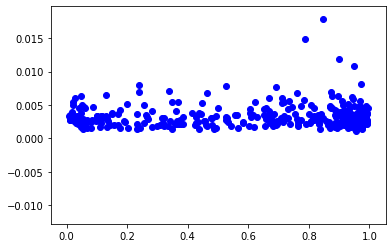

In [4]:
from keras import backend as K

y_hot_test = keras.utils.to_categorical(y_test)

sgd = SGD(learning_rate=0.002)

modelpi2= Sequential()

modelpi2.add(Dense(1000, activation='sigmoid', use_bias='true', input_dim=2914))

modelpi2.add(Dense(2, activation='sigmoid', use_bias='true', input_dim=1000))

modelpi2.add(Dense(5, activation='softmax', use_bias='true'))

modelpi2.compile(loss='categorical_crossentropy', optimizer=sgd , metrics=['accuracy'])

historypi2 = modelpi2.fit(X_train, y_hot, epochs=1000, batch_size=128, verbose=0 )

scorepi2 = modelpi2.evaluate(X_test, y_hot_test, batch_size=64)

layer_output = K.function([modelpi2.layers[0].input],[modelpi2.layers[1].output])
layer_out = layer_output([X_test])[0]

print (scorepi2)

print (modelpi2.summary())

for i in range(0,342):
        plt.scatter(layer_out[i,0],layer_out[i,1], color='b')
plt.show()

## 7. Deliverables:

a. Submit your code (this Jupyter file) via Tabula before the deadline.